# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisempi työttömyysturvamalli.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [3]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_0 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_baseline'
perusresults='results/perus_results9'

perustulomalli='best/perustulomalli'
perustuloresults='results/perustulo_results9'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

In [4]:
if False: # no baseline here
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                    train=False,predict=True,batch1=batch1,batch2=batch2,
                    save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/perus_results9',
                    callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)
else:
    cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
                  randomness=randomness,pinkslip=pinkslip,plotdebug=False)
    cc1.load_sim(load=perusresults)
    #cc1.render()

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



## Perustulo

Alustava versio perustulosta, joka ei mallinna koko perustuloa vielä. Tulee muuttumaan, kun mukana koko mallli.

No mortality included
perustulomalli
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo True
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 1 learning rate 0.0625 scaled 0.0625




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.998    |
| fps                | 1763     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0133  |
| total_timesteps    | 0        |
| value_loss         | 0.0303   |
----------------------------

---------------------------------
| explained_variance | 0.994    |
| fps                | 2622     |
| nupdates           | 60       |
| policy_entropy     | 0.986    |
| policy_loss        | 0.00215  |
| total_timesteps    | 143075   |
| value_loss         | 0.0737   |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2615     |
| nupdates           | 70       |
| policy_entropy     | 0.975    |
| policy_loss        | 0.0369   |
| total_timesteps    | 167325   |
| value_loss         | 0.0595   |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2609     |
| nupdates           | 80       |
| policy_entropy     | 0.969    |
| policy_loss        | 0.00408  |
| total_timesteps    | 191575   |
| value_loss         | 0.0428   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2641     |
| nupdates           | 330      |
| policy_entropy     | 1        |
| policy_loss        | -0.00709 |
| total_timesteps    | 797825   |
| value_loss         | 0.0316   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2642     |
| nupdates           | 340      |
| policy_entropy     | 0.958    |
| policy_loss        | -0.0187  |
| total_timesteps    | 822075   |
| value_loss         | 0.0295   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2643     |
| nupdates           | 350      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0215  |
| total_timesteps    | 846325   |
| value_loss         | 0.0419   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2651     |
| nupdates           | 600      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.0365  |
| total_timesteps    | 1452575  |
| value_loss         | 0.0403   |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2650     |
| nupdates           | 610      |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0461  |
| total_timesteps    | 1476825  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2649     |
| nupdates           | 620      |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0229  |
| total_timesteps    | 1501075  |
| value_loss         | 0.0272   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2656     |
| nupdates           | 870      |
| policy_entropy     | 0.942    |
| policy_loss        | -0.00831 |
| total_timesteps    | 2107325  |
| value_loss         | 0.0167   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2657     |
| nupdates           | 880      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0259  |
| total_timesteps    | 2131575  |
| value_loss         | 0.0411   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2657     |
| nupdates           | 890      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0203  |
| total_timesteps    | 2155825  |
| value_loss         | 0.0259   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 2660     |
| nupdates           | 1140     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0133  |
| total_timesteps    | 2762075  |
| value_loss         | 0.0744   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2660     |
| nupdates           | 1150     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.0196  |
| total_timesteps    | 2786325  |
| value_loss         | 0.0275   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2661     |
| nupdates           | 1160     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0171  |
| total_timesteps    | 2810575  |
| value_loss         | 0.0256   |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2545     |
| nupdates           | 1410     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0119  |
| total_timesteps    | 3416825  |
| value_loss         | 0.0179   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2537     |
| nupdates           | 1420     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0198  |
| total_timesteps    | 3441075  |
| value_loss         | 0.0258   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2528     |
| nupdates           | 1430     |
| policy_entropy     | 0.966    |
| policy_loss        | 0.000472 |
| total_timesteps    | 3465325  |
| value_loss         | 0.0221   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2483     |
| nupdates           | 1680     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0088  |
| total_timesteps    | 4071575  |
| value_loss         | 0.0189   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2483     |
| nupdates           | 1690     |
| policy_entropy     | 0.983    |
| policy_loss        | 0.000615 |
| total_timesteps    | 4095825  |
| value_loss         | 0.0247   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2484     |
| nupdates           | 1700     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.00379  |
| total_timesteps    | 4120075  |
| value_loss         | 0.0203   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2504     |
| nupdates           | 1950     |
| policy_entropy     | 0.951    |
| policy_loss        | -0.00226 |
| total_timesteps    | 4726325  |
| value_loss         | 0.0136   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2504     |
| nupdates           | 1960     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0148  |
| total_timesteps    | 4750575  |
| value_loss         | 0.017    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2504     |
| nupdates           | 1970     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.0225  |
| total_timesteps    | 4774825  |
| value_loss         | 0.0289   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2514     |
| nupdates           | 2220     |
| policy_entropy     | 0.92     |
| policy_loss        | 0.0244   |
| total_timesteps    | 5381075  |
| value_loss         | 0.0119   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2515     |
| nupdates           | 2230     |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0253  |
| total_timesteps    | 5405325  |
| value_loss         | 0.0269   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2515     |
| nupdates           | 2240     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.00978 |
| total_timesteps    | 5429575  |
| value_loss         | 0.0252   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2528     |
| nupdates           | 2490     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0234  |
| total_timesteps    | 6035825  |
| value_loss         | 0.036    |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2528     |
| nupdates           | 2500     |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0045   |
| total_timesteps    | 6060075  |
| value_loss         | 0.0133   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2529     |
| nupdates           | 2510     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.00153 |
| total_timesteps    | 6084325  |
| value_loss         | 0.0155   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2539     |
| nupdates           | 2760     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0188  |
| total_timesteps    | 6690575  |
| value_loss         | 0.0333   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2539     |
| nupdates           | 2770     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.0204  |
| total_timesteps    | 6714825  |
| value_loss         | 0.0404   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2539     |
| nupdates           | 2780     |
| policy_entropy     | 0.911    |
| policy_loss        | 0.00818  |
| total_timesteps    | 6739075  |
| value_loss         | 0.0177   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2547     |
| nupdates           | 3030     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0213  |
| total_timesteps    | 7345325  |
| value_loss         | 0.025    |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2547     |
| nupdates           | 3040     |
| policy_entropy     | 0.962    |
| policy_loss        | 0.00199  |
| total_timesteps    | 7369575  |
| value_loss         | 0.0234   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2548     |
| nupdates           | 3050     |
| policy_entropy     | 0.973    |
| policy_loss        | 0.00278  |
| total_timesteps    | 7393825  |
| value_loss         | 0.0195   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.998    |
| fps                | 2552     |
| nupdates           | 3300     |
| policy_entropy     | 1.08     |
| policy_loss        | -0.0318  |
| total_timesteps    | 8000075  |
| value_loss         | 0.0308   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2552     |
| nupdates           | 3310     |
| policy_entropy     | 0.961    |
| policy_loss        | 0.00164  |
| total_timesteps    | 8024325  |
| value_loss         | 0.0164   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2552     |
| nupdates           | 3320     |
| policy_entropy     | 1        |
| policy_loss        | -0.0209  |
| total_timesteps    | 8048575  |
| value_loss         | 0.0274   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2552     |
| nupdates           | 3570     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.0159  |
| total_timesteps    | 8654825  |
| value_loss         | 0.0332   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2552     |
| nupdates           | 3580     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0245  |
| total_timesteps    | 8679075  |
| value_loss         | 0.0258   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2552     |
| nupdates           | 3590     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0421  |
| total_timesteps    | 8703325  |
| value_loss         | 0.0365   |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2546     |
| nupdates           | 3840     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.00216 |
| total_timesteps    | 9309575  |
| value_loss         | 0.0195   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 2546     |
| nupdates           | 3850     |
| policy_entropy     | 0.94     |
| policy_loss        | -0.00176 |
| total_timesteps    | 9333825  |
| value_loss         | 0.0145   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2545     |
| nupdates           | 3860     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0245  |
| total_timesteps    | 9358075  |
| value_loss         | 0.0231   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 2526     |
| nupdates           | 4110     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.00782  |
| total_timesteps    | 9964325  |
| value_loss         | 0.0141   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 2525     |
| nupdates           | 4120     |
| policy_entropy     | 0.947    |
| policy_loss        | -0.00817 |
| total_timesteps    | 9988575  |
| value_loss         | 0.0274   |
---------------------------------
done
simulating  best/perustulomalli
predicting...


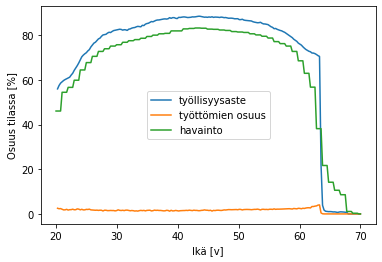

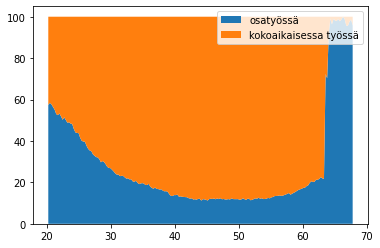

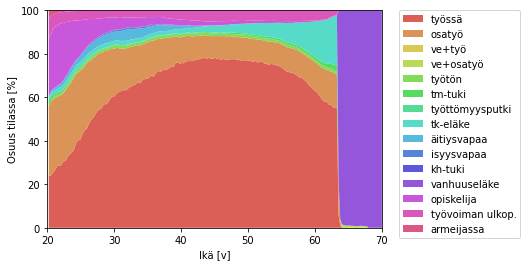

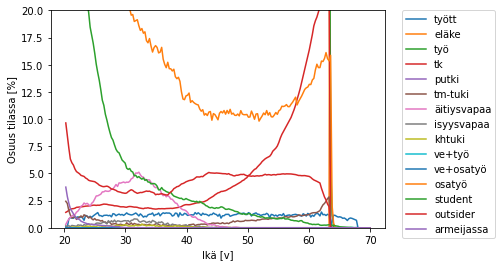

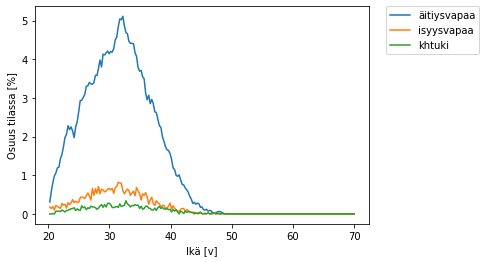

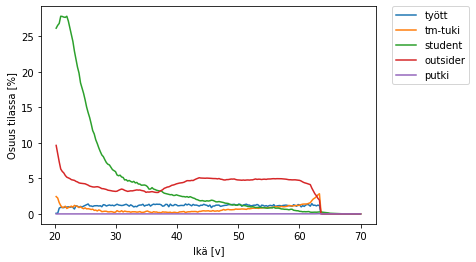

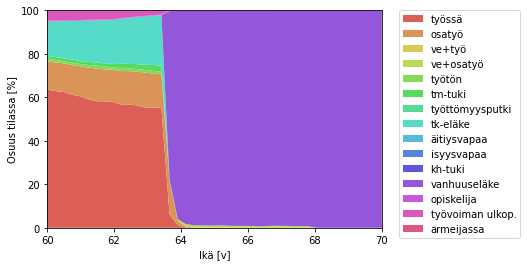

Lisäpäivillä on 15 henkilöä


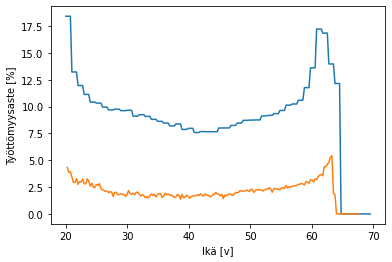

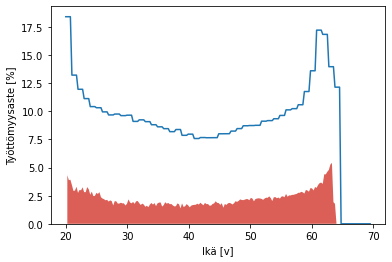

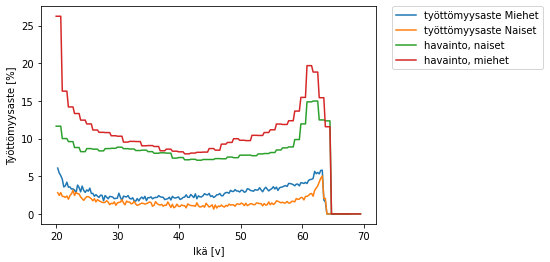

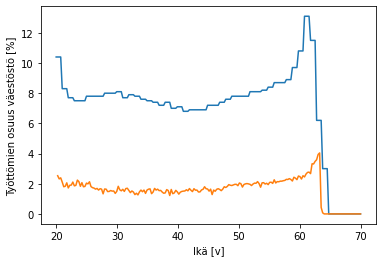

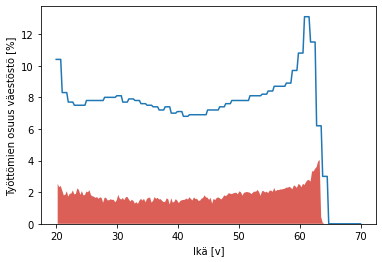

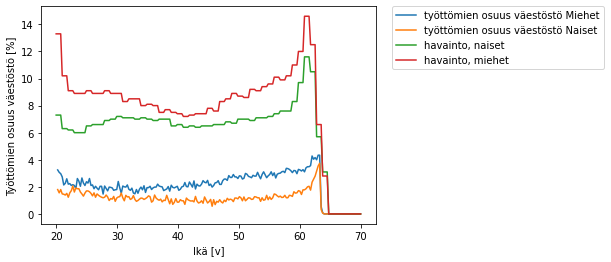

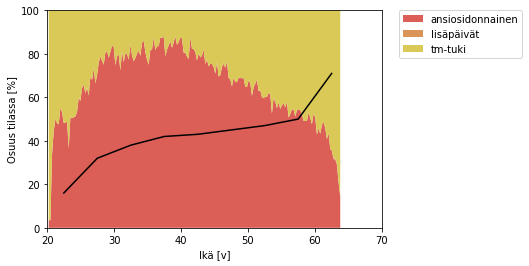

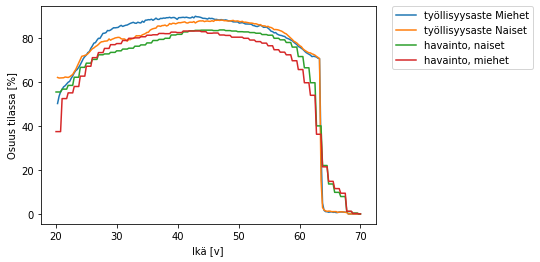

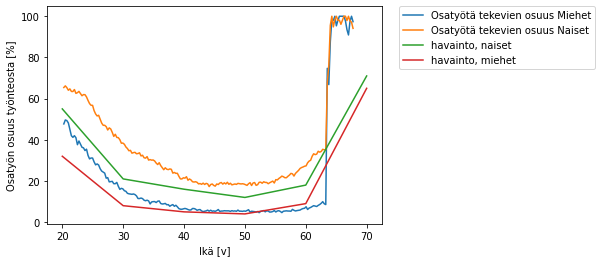

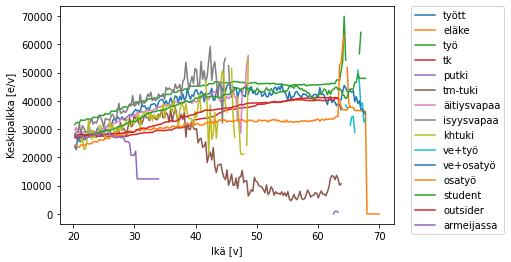

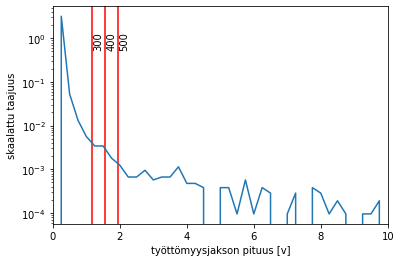

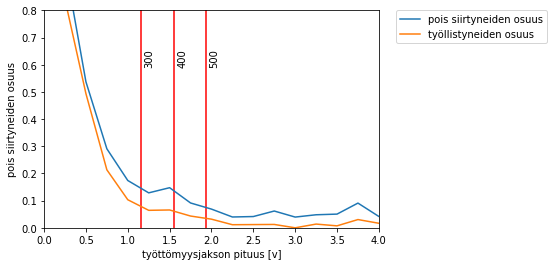

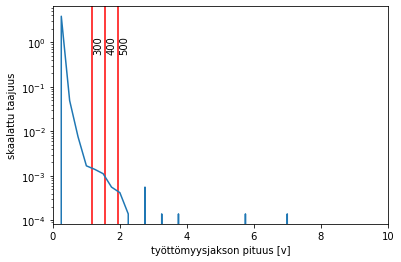

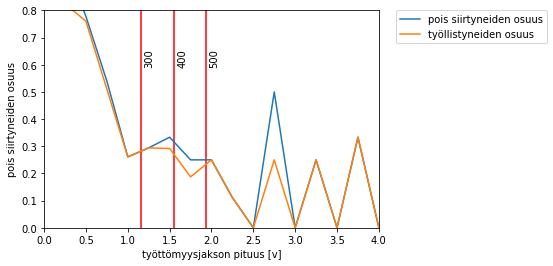

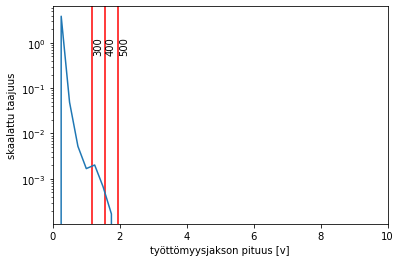

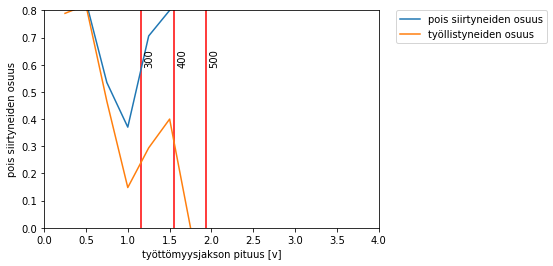

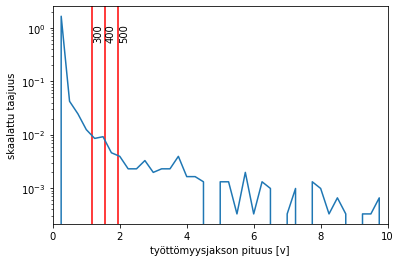

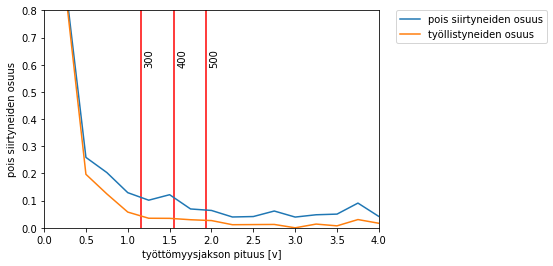

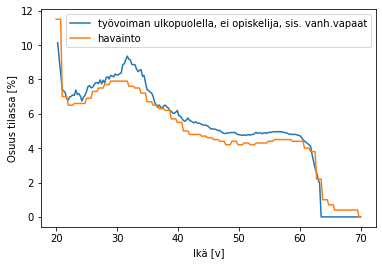

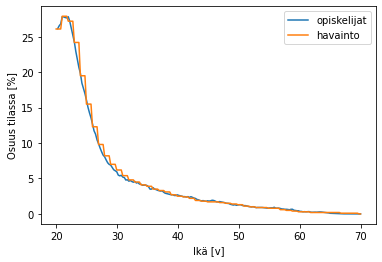

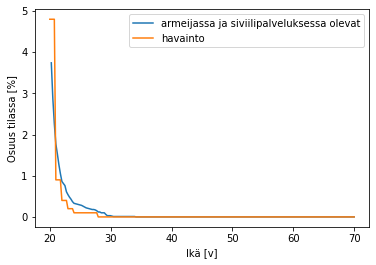

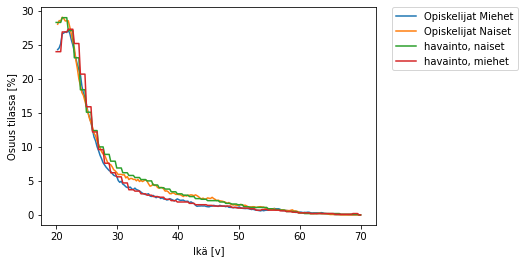

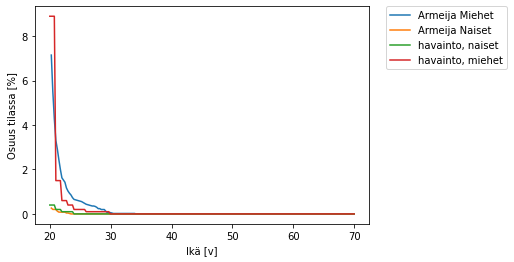

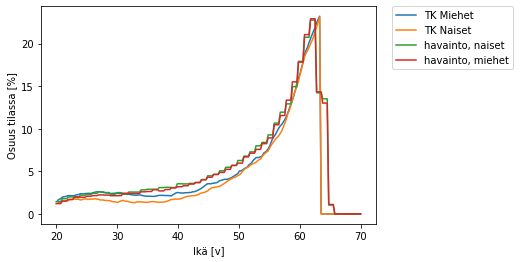

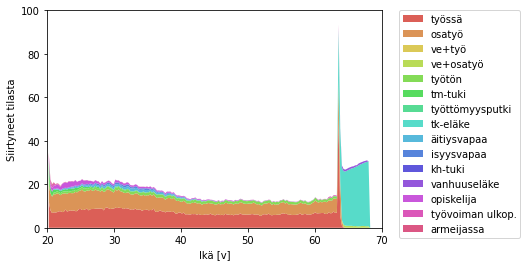

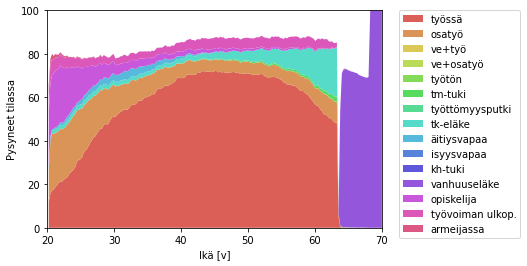

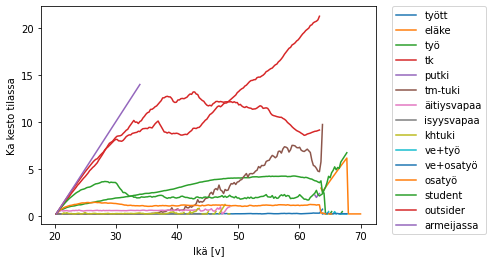

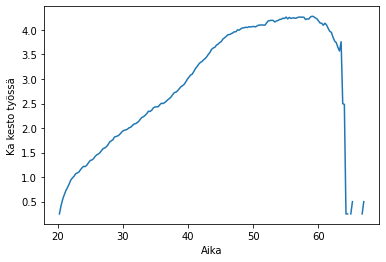

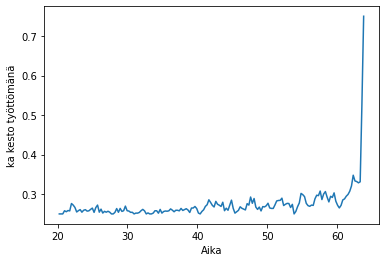

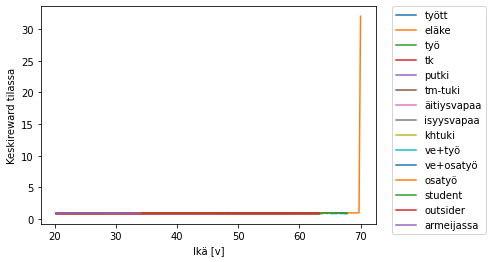

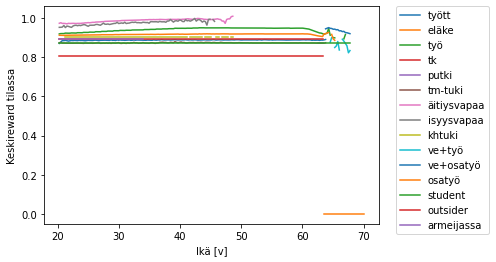

No handles with labels found to put in legend.


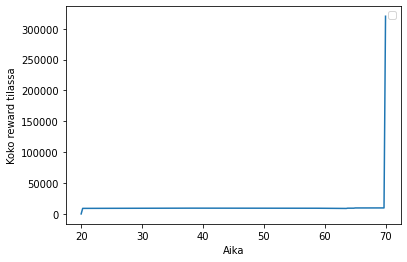

yhteensä reward 217.69640712869094


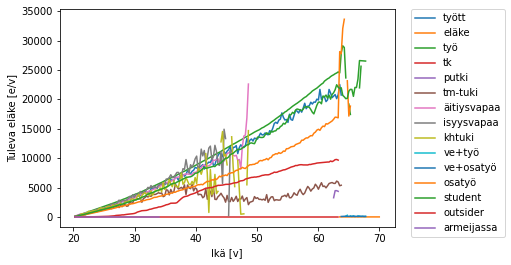

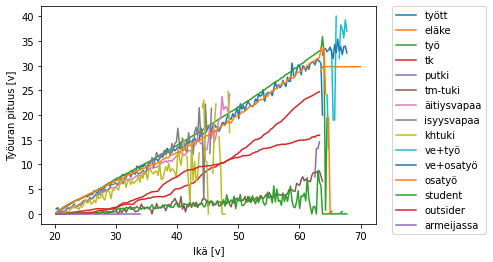

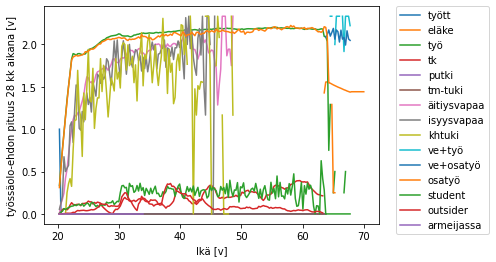

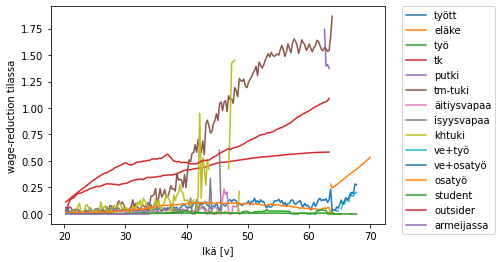

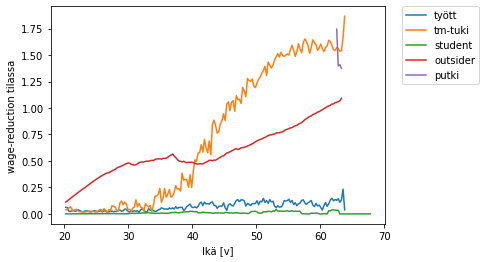

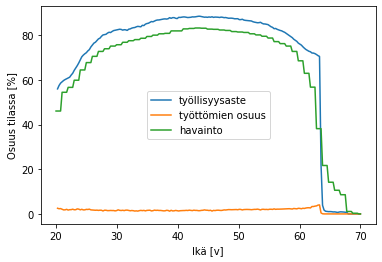

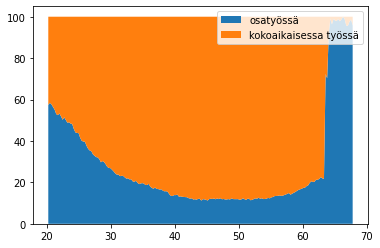

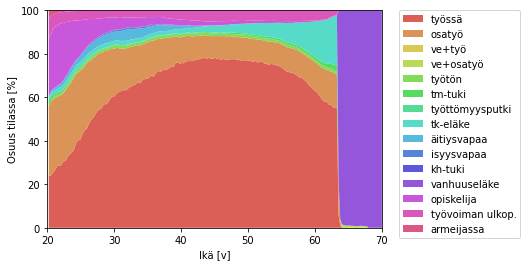

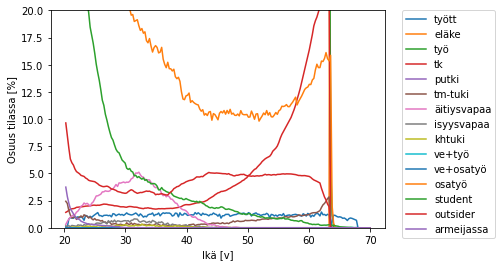

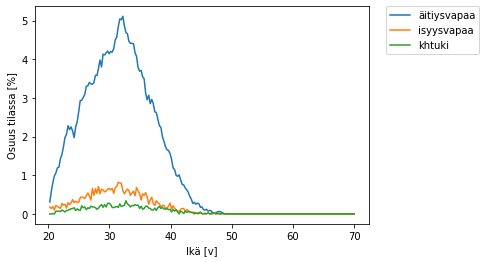

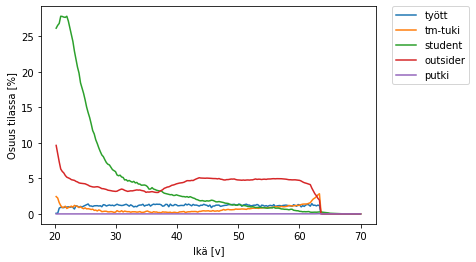

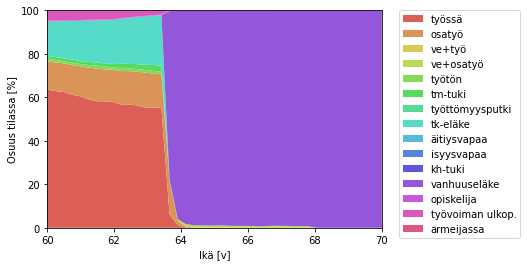

Lisäpäivillä on 15 henkilöä


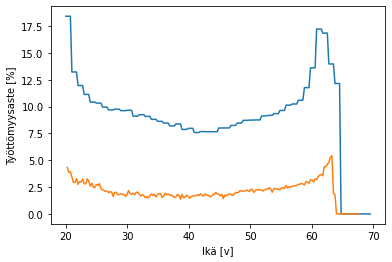

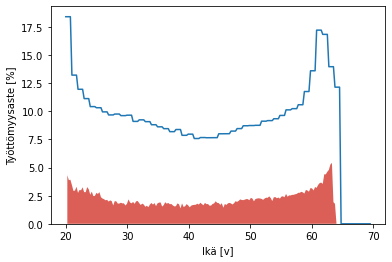

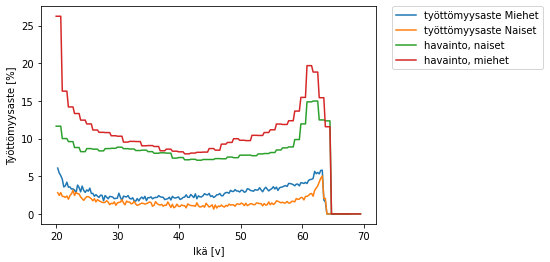

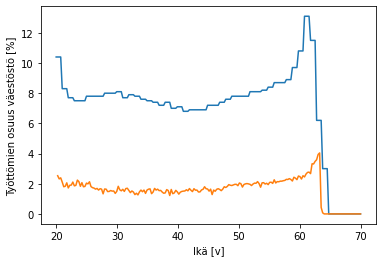

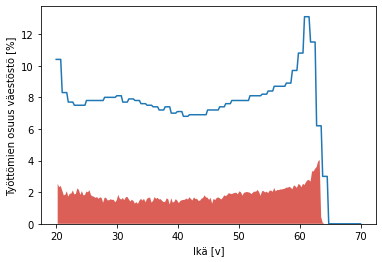

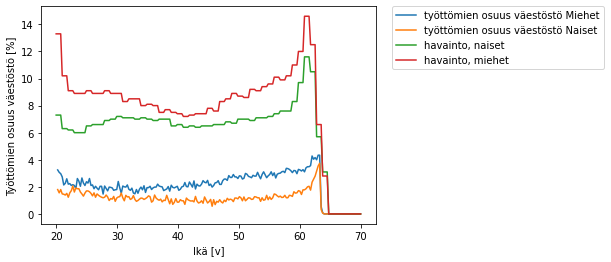

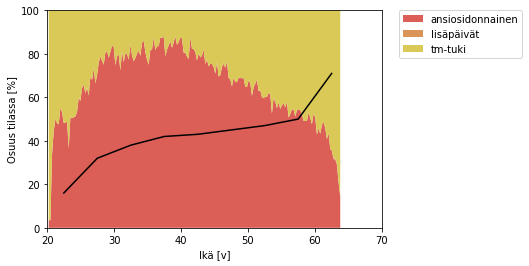

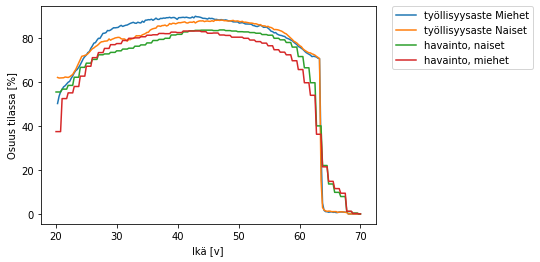

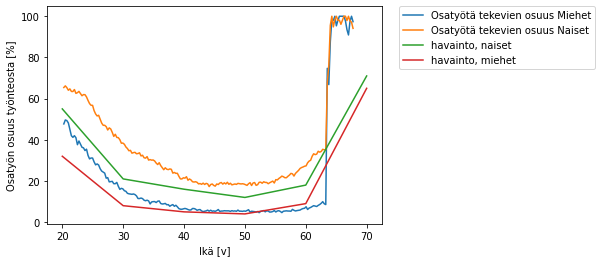

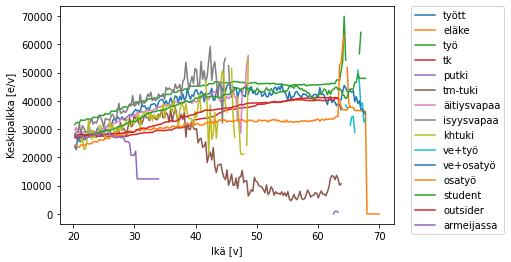

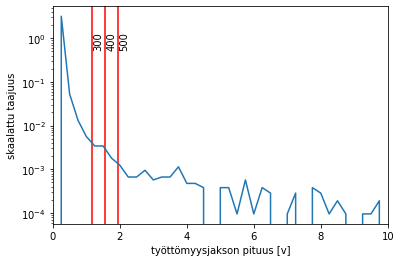

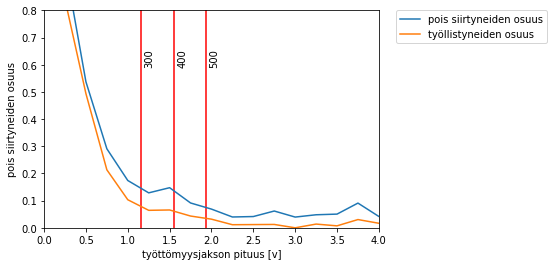

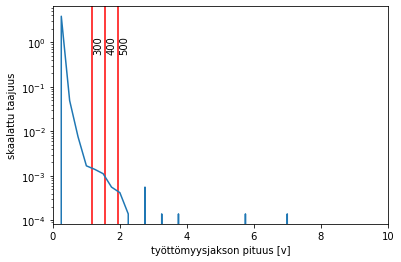

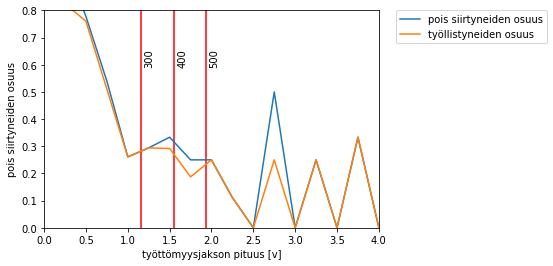

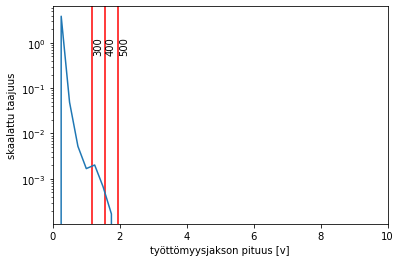

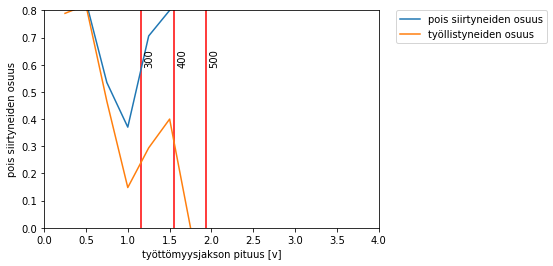

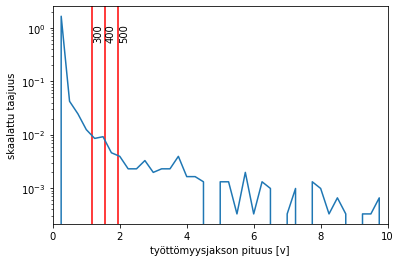

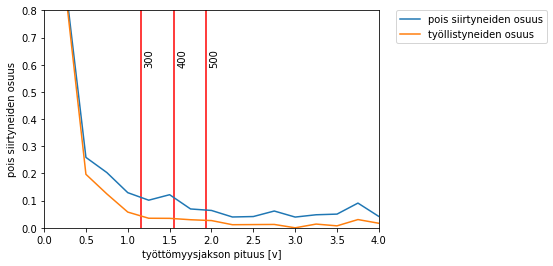

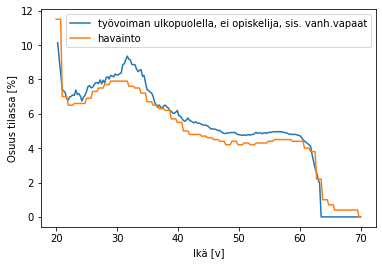

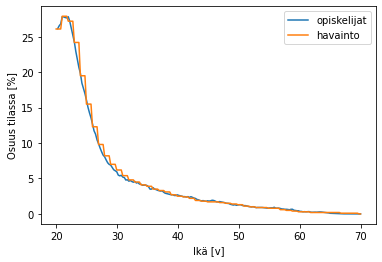

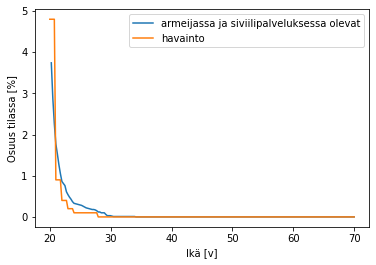

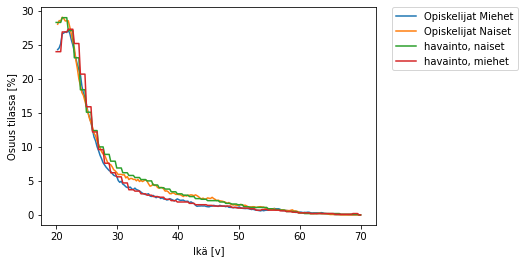

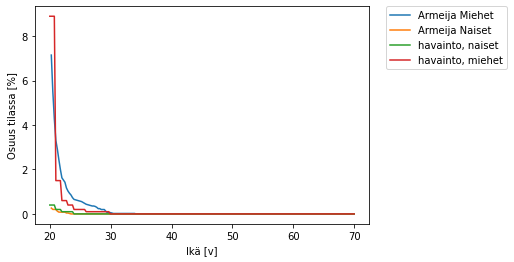

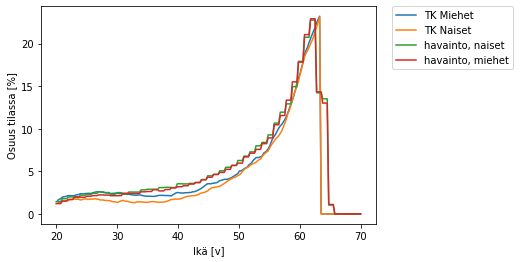

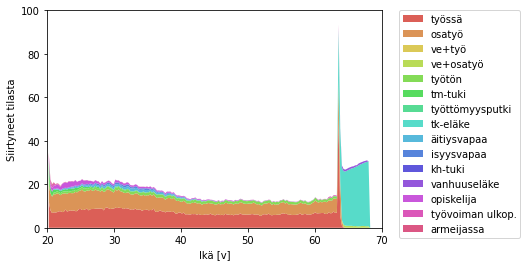

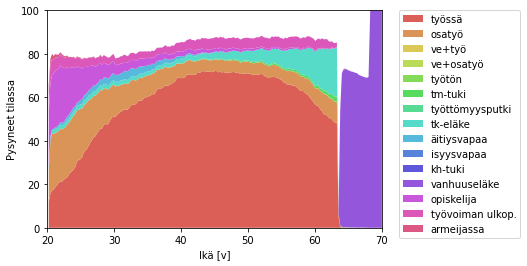

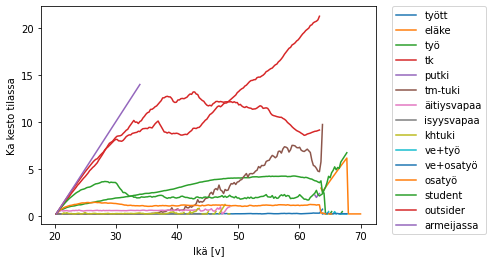

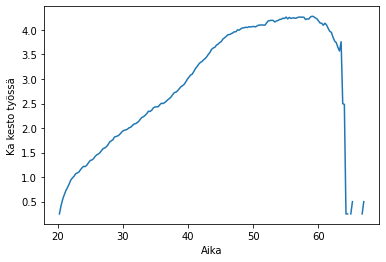

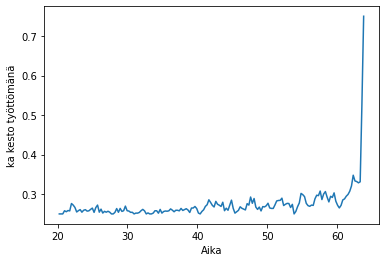

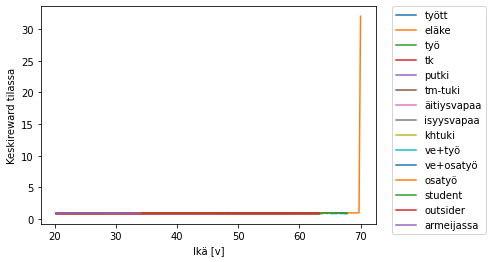

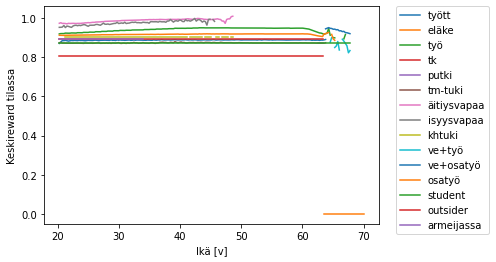

No handles with labels found to put in legend.


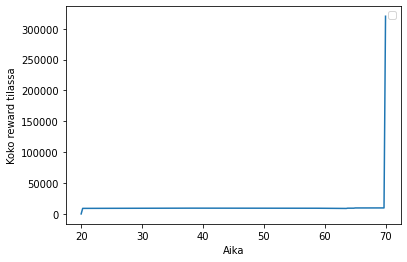

yhteensä reward 217.69640712869094


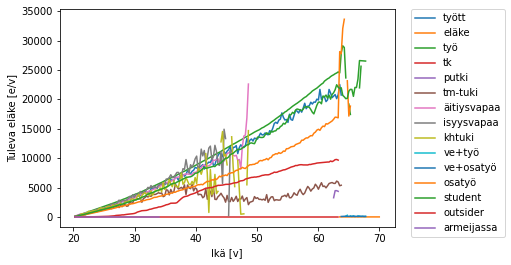

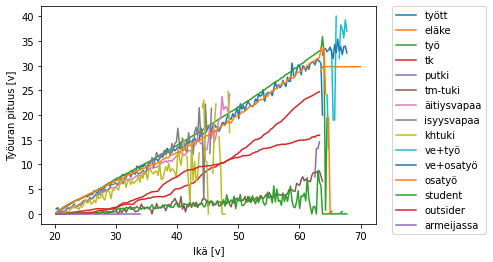

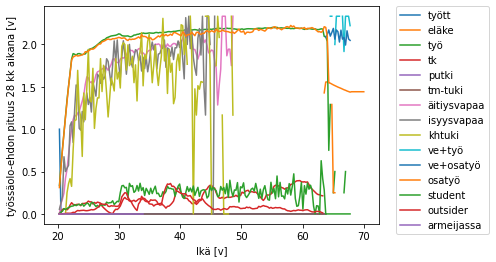

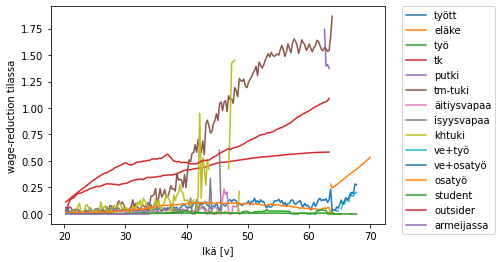

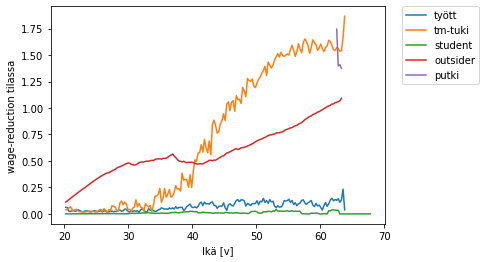

In [5]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,perustulo=True,mortality=mortality,
                 randomness=randomness)
cc1_pt.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                   train=True,predict=True,batch1=batch1,batch2=batch2,
                   save=perustulomalli,plot=True,
                   results=perustuloresults,start_from=perustulomalli,cont=True,
                   callback_minsteps=callback_minsteps,twostage=twostage)
cc1_pt.render(load=perustuloresults)


No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



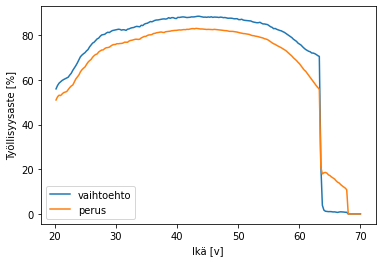

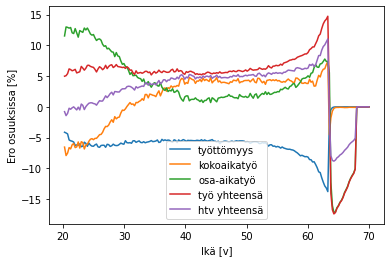

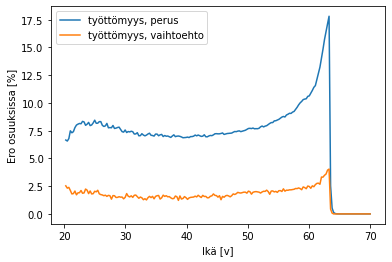

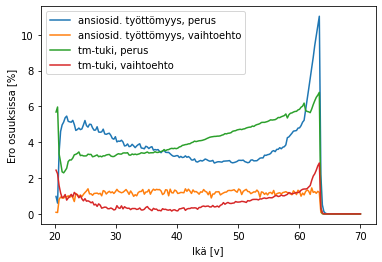

Työllisyysvaikutus 21-63-vuotiaisiin noin 124516 htv ja 192760 työllistä
Työllisyysastevaikutus 21-63-vuotiailla noin 6.52 prosenttia (81.88 vs 75.36)
epävarmuus työllisyysasteissa 0.0196, hajonta 0.0731


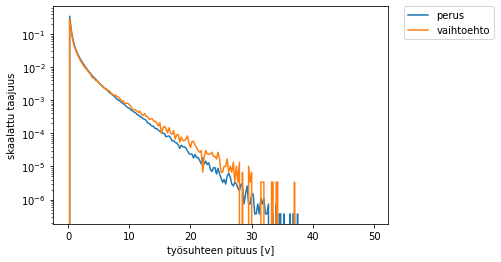

Jakauma ansiosidonnainen+tmtuki+putki, no max age
perus keskikesto 0.6943269893487021 v vaihtoehto Keskikesto 0.3029936672423719 v
Skaalaamaton perus lkm 472994 v vaihtoehto lkm 34740 v
Skaalaamaton perus työtpäiviä yht 328412.5 v vaihtoehto työtpäiviä yht 10526.0 v


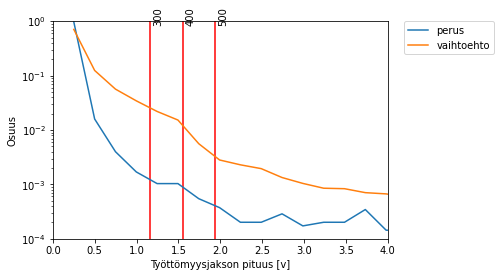

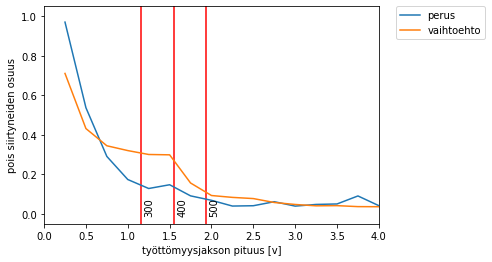

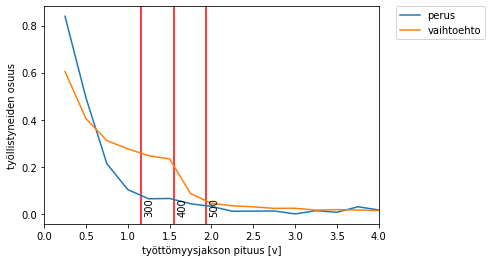

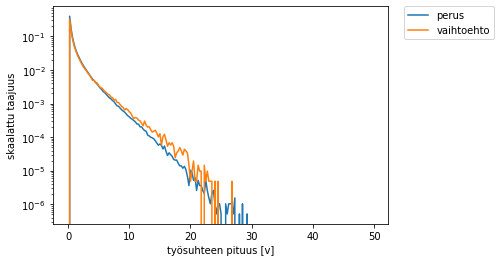

Jakauma ansiosidonnainen+tmtuki+putki, max age 54
perus keskikesto 0.44009814535407765 v vaihtoehto Keskikesto 0.25869382964453386 v
Skaalaamaton perus lkm 408272 v vaihtoehto lkm 29820 v
Skaalaamaton perus työtpäiviä yht 179679.75 v vaihtoehto työtpäiviä yht 7714.25 v


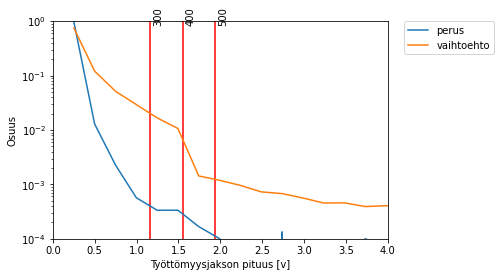

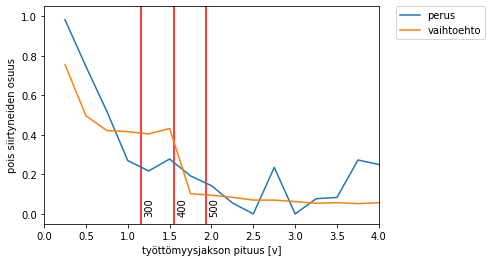

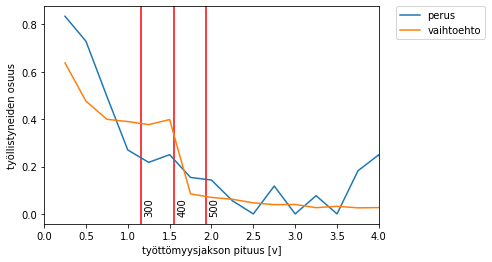

In [6]:
cc1_pt=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness)
cc1_pt.load_sim(load=perustuloresults)
cc1_pt.compare_with(cc1)